# Лабораторная работа №1
## Выполнил студент группы БФИ1902 Копытько Сергей Максимович 


# Задание №1:
1. Создать Jupyter Notebook со следующим наименованием: Lab1_Группа_ФИО
2. Создать новую ячейку с помощью кнопки 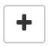
3. В созданной ячейке по указанной ниже форме заполните оглавление файла,
заменив наименование группы и вписав свое ФИО,
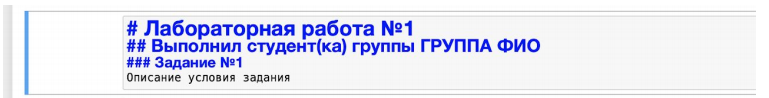
Рисунок 1 - Форма оглавления файла в ячейке
после чего создайте еще одну ячейку и напишите следующий код: 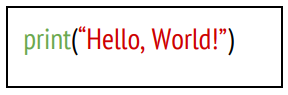
4. С помощью кнопки "Запуск" запустите выполнение всех ячеек.
5. После выполнения у вас должна отформатироваться ячейка с оглавлением и
должен выполниться “Hello, World!” (см. рис. 2).
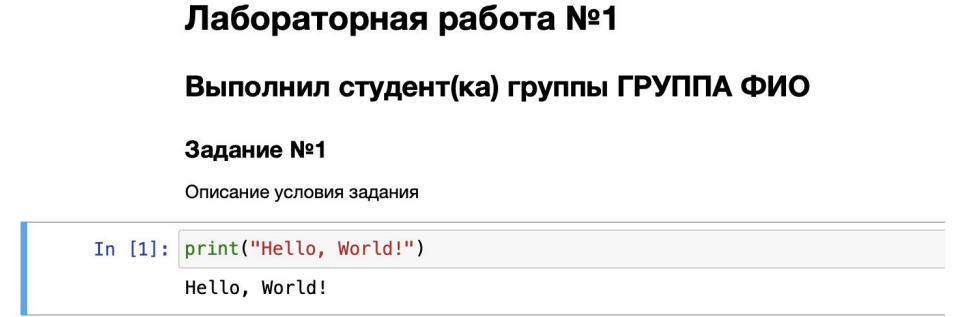
Рисунок 2 - Ячейки после выполнения
print(“Hello, World!”)
# Задание №2:
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры m, n, min_limit, max_limit, где m и n указывают размер
матрицы, а min_lim и max_lim - минимальное и максимальное значение для
генерируемого числа . По умолчанию при отсутствии параметров принимать следующие
значения:
m = 50
n = 50
min_limit = -250
max_limit = 1000 + (номер своего варианта)
# Задание №3:
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.
Методы: 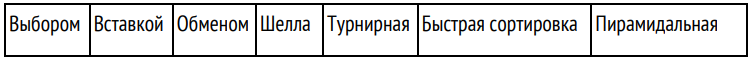
# Задание №4:
Создать публичный репозиторий на github, и запушить выполненное задание в
.ipynb формате.

### Задание №1

In [1]:
print("Hello, World!")

Hello, World!


### Задание №2

In [2]:
from random import randint
import numpy as np

n, m = 50, 50
min_limit = -250
max_limit = 1007

a = [[randint(min_limit, max_limit) for j in range(m)] for i in range(n)]
an = np.asarray(a)
print(an)

[[ 187  503  468 ...  715  124  -20]
 [ 732  587 -215 ... -128 -217  237]
 [ 462    8  571 ...  206  378  178]
 ...
 [ 941   92  542 ...  410  165 -125]
 [ 968  556  417 ...  475  552  668]
 [ 191  701  857 ...  306  804  973]]


### Задание №3

### Сортировка выбором 

In [3]:
%%time
import numpy as np

def selection_sort(nums):  
    for i in range(len(nums)):
        lowest_value_index = i
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]

k=0
while k<=n-1:
    selection_sort(a[k])
    k=k+1

an = np.asarray(a)
print(an) 

[[-241 -176 -168 ...  937  944  986]
 [-250 -240 -233 ...  949  954  988]
 [-248 -183 -154 ...  941  968  976]
 ...
 [-207 -167 -133 ...  925  941  948]
 [-227 -217 -177 ...  943  968  971]
 [-222 -176 -146 ...  973  988  990]]
Wall time: 15 ms


### Сортировка вставками 

In [4]:
%%time
import numpy as np

def insertion_sort(nums):  
    for i in range(1, len(nums)):
        item_to_insert = nums[i]
        j = i - 1
        while j >= 0 and nums[j] > item_to_insert:
            nums[j + 1] = nums[j]
            j -= 1
        nums[j + 1] = item_to_insert

k=0
while k<=n-1:
    insertion_sort(a[k])
    k=k+1

an = np.asarray(a)
print(an) 

[[-248 -248 -244 ...  949  954 1005]
 [-238 -204 -197 ...  942  985 1007]
 [-218 -186 -178 ...  928  951  970]
 ...
 [-231 -222 -213 ...  895  922 1001]
 [-228 -184 -125 ...  947  952 1001]
 [-245 -243 -206 ...  900  938  972]]
Wall time: 2 ms


### Пирамидальная сортировка

In [5]:
%%time
import numpy as np

def heap_sort(alist):
    build_max_heap(alist)
    for i in range(len(alist) - 1, 0, -1):
        alist[0], alist[i] = alist[i], alist[0]
        max_heapify(alist, index=0, size=i)
 
def parent(i):
    return (i - 1)//2
 
def left(i):
    return 2*i + 1
 
def right(i):
    return 2*i + 2
 
def build_max_heap(alist): 
    length = len(alist)
    start = parent(length - 1)
    while start >= 0:
        max_heapify(alist, index=start, size=length)
        start = start - 1
 
def max_heapify(alist, index, size):
    l = left(index)
    r = right(index)
    if (l < size and alist[l] > alist[index]):
        largest = l
    else:
        largest = index
    if (r < size and alist[r] > alist[largest]):
        largest = r
    if (largest != index):
        alist[largest], alist[index] = alist[index], alist[largest]
        max_heapify(alist, largest, size)

k=0
while k<=n-1:
    heap_sort(a[k])
    k=k+1

an = np.asarray(a)
print(an) 

[[-248 -248 -244 ...  949  954 1005]
 [-238 -204 -197 ...  942  985 1007]
 [-218 -186 -178 ...  928  951  970]
 ...
 [-231 -222 -213 ...  895  922 1001]
 [-228 -184 -125 ...  947  952 1001]
 [-245 -243 -206 ...  900  938  972]]
Wall time: 21 ms


### Быстрая сортировка

In [6]:
%%time
import numpy as np

def quick_sort(data):
    less = []
    pivotList = []
    more = []
    if len(data) <= 1:
        return data
    else:
        pivot = data[0]
        for i in data:
            if i < pivot:
                less.append(i)
            elif i > pivot:
                more.append(i)
            else:
                pivotList.append(i)
        less = quick_sort(less)
        more = quick_sort(more)
        return less + pivotList + more

k=0
while k<=n-1:
    quick_sort(a[k])
    k=k+1

an = np.asarray(a)
print(an) 

[[-248 -248 -244 ...  949  954 1005]
 [-238 -204 -197 ...  942  985 1007]
 [-218 -186 -178 ...  928  951  970]
 ...
 [-231 -222 -213 ...  895  922 1001]
 [-228 -184 -125 ...  947  952 1001]
 [-245 -243 -206 ...  900  938  972]]
Wall time: 25 ms


### Сортировка обменом 

In [7]:
%%time
import numpy as np

def bubble_sort(nums):  
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(nums) - 1):
            if nums[i] > nums[i + 1]:
                # Заменить элементы
                nums[i], nums[i + 1] = nums[i + 1], nums[i]
                swapped = True

k=0
while k<=n-1:
    bubble_sort(a[k])
    k=k+1

an = np.asarray(a)
print(an) 

[[-248 -248 -244 ...  949  954 1005]
 [-238 -204 -197 ...  942  985 1007]
 [-218 -186 -178 ...  928  951  970]
 ...
 [-231 -222 -213 ...  895  922 1001]
 [-228 -184 -125 ...  947  952 1001]
 [-245 -243 -206 ...  900  938  972]]
Wall time: 999 µs


### Сортировка Шелла

In [8]:
%%time
import numpy as np

def shell_sort(nums):
    inc = len(nums) // 2
    while inc:
        for i, el in enumerate(nums):
            while i >= inc and nums[i - inc] > el:
                nums[i] = nums[i - inc]
                i -= inc
            nums[i] = el
        inc = int(inc // 2)
    return nums

k=0
while k<=n-1:
    shell_sort(a[k])
    k=k+1

an = np.asarray(a)
print(an) 

[[-248 -248 -244 ...  949  954 1005]
 [-238 -204 -197 ...  942  985 1007]
 [-218 -186 -178 ...  928  951  970]
 ...
 [-231 -222 -213 ...  895  922 1001]
 [-228 -184 -125 ...  947  952 1001]
 [-245 -243 -206 ...  900  938  972]]
Wall time: 4.99 ms


### Турнирная сортировка

In [9]:
%%time
import numpy as np

def tournamentSort(arr):
    tree = [None] * 2 * (len(arr) + len(arr) % 2)
    index = len(tree) - len(arr) - len(arr) % 2

    for i, v in enumerate(arr):
        tree[index + i] = (i, v)

    for j in range(len(arr)):
        n = len(arr)
        index = len(tree) - len(arr) - len(arr) % 2
        while index > -1:
            n = (n + 1) // 2
            for i in range(n):
                i = max(index + i * 2, 1)
                if tree[i] is not None and tree[i + 1] is not None:
                    if tree[i] < tree[i + 1]:
                        tree[i // 2] = tree[i]
                    else:
                        tree[i // 2] = tree[i + 1]
                else:
                        tree[i // 2] = tree[i] if tree[i] is not None else tree[i + 1]
            index -= n
    
        index, x = tree[0]
        arr[j] = x
        tree[len(tree) - len(arr) - len(arr) % 2 + index] = None

k=0
while k<=n-1:
    tournamentSort(a[k])
    k=k+1

an = np.asarray(a)
print(an) 

[[-248 -248 -248 ...  219  241  241]
 [-238 -238 -204 ...  486  515  515]
 [-218 -218 -186 ...  595  600  600]
 ...
 [-231 -231 -222 ...  419  510  510]
 [-228 -228 -184 ...  377  379  379]
 [-245 -245 -243 ...  354  425  425]]
Wall time: 117 ms


 ## Вывод
### В этой лабораторной работе была изучена основа работы с Jupyter Notebook, а также выполнена реализация методов сортировки 